In [8]:
import numpy as np
import scipy
import scipy.stats
import scipy.signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from keras.layers.normalization import BatchNormalization

## MNIST with complex dense model

Create a complex MNIST model with 5-10 dense layers and about 500k weights that overfits (follow accuracies during training). 

Add batch normalisation to the model and plot training and validation accuracies. What are your findings?

(Give your models descriptive names to make it easier to do the comparisons)

Add to the model a) regularisation, b) dropout layers and plot training and validation accuracies. Again, write a brief overview of your findings.

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_val, y_val) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_val = x_val.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train_cat = keras.utils.to_categorical(y_train)
y_val_cat = keras.utils.to_categorical(y_val)

In [3]:

model1 = keras.models.Sequential()

model1.add(keras.layers.Dense(300, input_shape=(28 * 28,), activation='relu'))
model1.add(keras.layers.Dense(200, activation='relu'))
model1.add(keras.layers.Dense(200, activation='relu'))
model1.add(keras.layers.Dense(200, activation='relu'))
model1.add(keras.layers.Dense(200, activation='sigmoid'))
model1.add(keras.layers.Dense(200, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2

In [4]:
 model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

 hist1 = model1.fit(x_train, y_train_cat, epochs=50, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/50
938/938 [==============================] - 2s 2ms/step - loss: 2.2298 - acc: 0.2339 - val_loss: 1.8774 - val_acc: 0.5152
Epoch 2/50
938/938 [==============================] - 1s 2ms/step - loss: 1.0094 - acc: 0.7146 - val_loss: 0.5396 - val_acc: 0.8501
Epoch 3/50
938/938 [==============================] - 1s 1ms/step - loss: 0.4437 - acc: 0.8732 - val_loss: 0.3581 - val_acc: 0.8976
Epoch 4/50
938/938 [==============================] - 1s 1ms/step - loss: 0.3273 - acc: 0.9061 - val_loss: 0.2846 - val_acc: 0.9161
Epoch 5/50
938/938 [==============================] - 1s 1ms/step - loss: 0.2636 - acc: 0.9229 - val_loss: 0.2414 - val_acc: 0.9300
Epoch 6/50
938/938 [==============================] - 1s 1ms/step - loss: 0.2195 - acc: 0.9369 - val_loss: 0.2084 - val_acc: 0.9390
Epoch 7/50
938/938 [==============================] - 1s 1ms/step - loss: 0.1872 - acc: 0.9458 - val_loss: 0.1835 - val_acc: 0.9447
Epoch 8/50
938/938 [==============================] - 1s 1ms/step - loss: 0.

Training acc 0.9997833371162415 Validation acc 0.9750000238418579


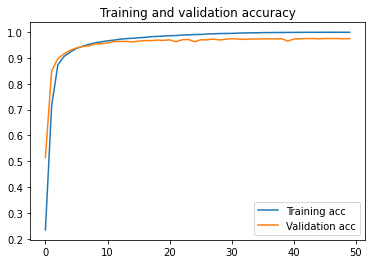

In [6]:
acc = hist1.history['acc']
val_acc = hist1.history['val_acc']
loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

print('Training acc', acc[-1], 'Validation acc', val_acc[-1])

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [9]:
model2 = keras.models.Sequential()

model2.add(keras.layers.Dense(300, input_shape=(28 * 28,), activation='relu'))
model2.add(BatchNormalization())
model2.add(keras.layers.Dense(200, activation='relu'))
model2.add(BatchNormalization())
model2.add(keras.layers.Dense(200, activation='relu'))
model2.add(BatchNormalization())
model2.add(keras.layers.Dense(200, activation='relu'))
model2.add(BatchNormalization())
model2.add(keras.layers.Dense(200, activation='sigmoid'))
model2.add(BatchNormalization())
model2.add(keras.layers.Dense(200, activation='relu'))
model2.add(BatchNormalization())
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dense_9 (Dense)              (None, 200)               60200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_11 (Dense)             (None, 200)              

In [10]:
 model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

 hist2 = model2.fit(x_train, y_train_cat, epochs=50, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/50
938/938 [==============================] - 2s 3ms/step - loss: 0.3702 - acc: 0.8861 - val_loss: 0.1643 - val_acc: 0.9476
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1498 - acc: 0.9540 - val_loss: 0.1164 - val_acc: 0.9630
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1063 - acc: 0.9685 - val_loss: 0.1014 - val_acc: 0.9673
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0825 - acc: 0.9745 - val_loss: 0.0927 - val_acc: 0.9696
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0651 - acc: 0.9797 - val_loss: 0.0874 - val_acc: 0.9711
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0540 - acc: 0.9834 - val_loss: 0.0848 - val_acc: 0.9731
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0447 - acc: 0.9865 - val_loss: 0.0840 - val_acc: 0.9740
Epoch 8/50
938/938 [==============================] - 2s 2ms/step - loss: 0.

Training acc 0.9993333220481873 Validation acc 0.9793000221252441


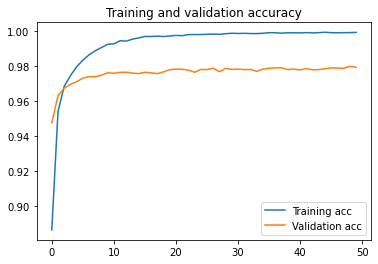

In [11]:
acc = hist2.history['acc']
val_acc = hist2.history['val_acc']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

print('Training acc', acc[-1], 'Validation acc', val_acc[-1])

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In this case, model became more overfitted. Maybe I should have not put batch normalization after each layer

a)


In [12]:
model_a = keras.models.Sequential()

model_a.add(keras.layers.Dense(300, input_shape=(28 * 28,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model_a.add(BatchNormalization())
model_a.add(keras.layers.Dense(200, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model_a.add(BatchNormalization())
model_a.add(keras.layers.Dense(200, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model_a.add(BatchNormalization())
model_a.add(keras.layers.Dense(200, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model_a.add(BatchNormalization())
model_a.add(keras.layers.Dense(200, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.01)))
model_a.add(BatchNormalization())
model_a.add(keras.layers.Dense(200, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model_a.add(BatchNormalization())
model_a.add(keras.layers.Dense(10, activation='softmax'))

model_a.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200      
_________________________________________________________________
dense_16 (Dense)             (None, 200)               60200     
_________________________________________________________________
batch_normalization_7 (Batch (None, 200)               800       
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
batch_normalization_8 (Batch (None, 200)               800       
_________________________________________________________________
dense_18 (Dense)             (None, 200)              

In [16]:
 model_a.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

 hist3 = model_a.fit(x_train, y_train_cat, epochs=50, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 12.6723 - acc: 0.8875 - val_loss: 10.3046 - val_acc: 0.9531
Epoch 2/50
938/938 [==============================] - 2s 3ms/step - loss: 8.6138 - acc: 0.9572 - val_loss: 7.1027 - val_acc: 0.9631
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 5.9370 - acc: 0.9689 - val_loss: 4.9191 - val_acc: 0.9688
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 4.1080 - acc: 0.9743 - val_loss: 3.4431 - val_acc: 0.9649
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 2.8652 - acc: 0.9761 - val_loss: 2.4101 - val_acc: 0.9721
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 2.0168 - acc: 0.9769 - val_loss: 1.7140 - val_acc: 0.9698
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 1.4418 - acc: 0.9768 - val_loss: 1.2530 - val_acc: 0.9678
Epoch 8/50
938/938 [==============================] - 3s 3ms/step - loss: 

Training acc 0.9802166819572449 Validation acc 0.9729999899864197


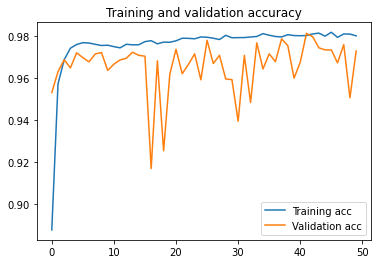

In [17]:
acc = hist3.history['acc']
val_acc = hist3.history['val_acc']
loss = hist3.history['loss']
val_loss = hist3.history['val_loss']

print('Training acc', acc[-1], 'Validation acc', val_acc[-1])

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

b)

In [15]:
model_b = keras.models.Sequential()

model_b.add(keras.layers.Dense(300, input_shape=(28 * 28,), activation='relu'))
model_b.add(BatchNormalization())
model_b.add(keras.layers.Dropout(0.3))
model_b.add(keras.layers.Dense(200, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(keras.layers.Dropout(0.3))
model_b.add(keras.layers.Dense(200, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(keras.layers.Dropout(0.3))
model_b.add(keras.layers.Dense(200, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(keras.layers.Dropout(0.3))
model_b.add(keras.layers.Dense(200, activation='sigmoid'))
model_b.add(BatchNormalization())
model_b.add(keras.layers.Dropout(0.3))
model_b.add(keras.layers.Dense(200, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(keras.layers.Dropout(0.3))
model_b.add(keras.layers.Dense(10, activation='softmax'))

model_b.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_12 (Batc (None, 300)               1200      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 200)               60200     
_________________________________________________________________
batch_normalization_13 (Batc (None, 200)               800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 200)              

In [18]:
 model_b.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

 hist3 = model_b.fit(x_train, y_train_cat, epochs=50, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.9670 - acc: 0.6965 - val_loss: 0.2605 - val_acc: 0.9225
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4456 - acc: 0.8676 - val_loss: 0.1952 - val_acc: 0.9414
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3515 - acc: 0.8969 - val_loss: 0.1636 - val_acc: 0.9493
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3065 - acc: 0.9104 - val_loss: 0.1421 - val_acc: 0.9568
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2686 - acc: 0.9221 - val_loss: 0.1292 - val_acc: 0.9623
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2420 - acc: 0.9286 - val_loss: 0.1193 - val_acc: 0.9639
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2256 - acc: 0.9351 - val_loss: 0.1138 - val_acc: 0.9672
Epoch 8/50
938/938 [==============================] - 4s 4ms/step - loss: 0.

Training acc 0.9793166518211365 Validation acc 0.9833999872207642


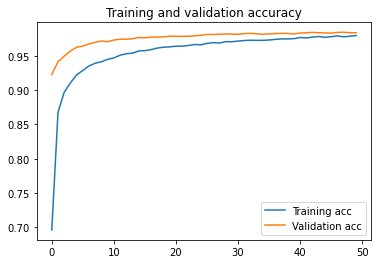

In [19]:
acc = hist3.history['acc']
val_acc = hist3.history['val_acc']
loss = hist3.history['loss']
val_loss = hist3.history['val_loss']

print('Training acc', acc[-1], 'Validation acc', val_acc[-1])

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

I got some interesting results, with dropouts (model_b) the validation accuracy became higher than the training one. In model_a  validation accuracy is lower than that of training one yet there was a point, when it became slightly higher. In the end, i would say, that I like model_b more due to its results.